In [10]:
!pip install --upgrade ucla_plha

   ---------------------------------------- 0.0/32.4 MB ? eta -:--:--
   - -------------------------------------- 1.0/32.4 MB ? eta -:--:--
   ----- ---------------------------------- 4.2/32.4 MB 9.3 MB/s eta 0:00:04
   --------- ------------------------------ 7.3/32.4 MB 11.3 MB/s eta 0:00:03
   ------------ --------------------------- 10.5/32.4 MB 12.3 MB/s eta 0:00:02
   ---------------- ----------------------- 13.6/32.4 MB 12.8 MB/s eta 0:00:02
   -------------------- ------------------- 16.8/32.4 MB 13.0 MB/s eta 0:00:02
   ------------------------ --------------- 19.9/32.4 MB 13.4 MB/s eta 0:00:01
   ---------------------------- ----------- 23.1/32.4 MB 13.5 MB/s eta 0:00:01
   -------------------------------- ------- 26.2/32.4 MB 13.6 MB/s eta 0:00:01
   ------------------------------------ --- 29.4/32.4 MB 13.7 MB/s eta 0:00:01
   ------------------------------------ --- 29.4/32.4 MB 13.7 MB/s eta 0:00:01
   ------------------------------------- -- 30.4/32.4 MB 12.0 MB/s eta 0:

Text(0, 0.5, 'PGA (g)')

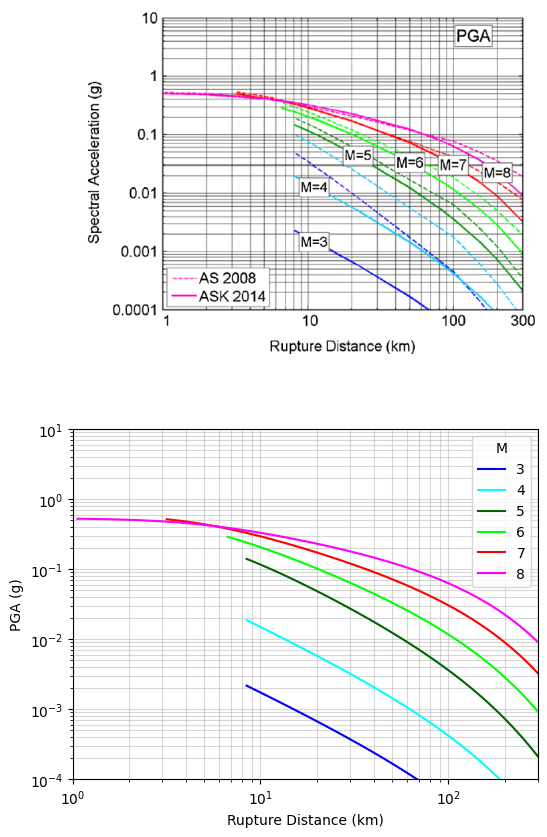

In [2]:
# Reproduce Fig. 8 from ASK model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.ground_motion_models import ask14

rrup_vec = np.logspace(0, np.log10(300), 100)
m_vec = np.asarray([3, 4, 5, 6, 7, 8])
rrup_lim = np.asarray([8, 8, 8, 6.5, 3.0, 1.0])
ztor_vec = np.asarray([8, 8, 8, 6.5, 3.0, 0.0])
colors = np.asarray(['blue', 'cyan', 'darkgreen', 'lime', 'red', 'magenta'])
rrup = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
m = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
ztor = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
I = 0
for i in range(len(m_vec)):
    for j in range(len(rrup_vec)):
        m[I] = m_vec[i]
        rrup[I] = rrup_vec[j]
        ztor[I] = ztor_vec[i]
        I += 1

vs30 = 760
dip = np.full(len(m), 90.0)
rx = np.full(len(m), 0.0)
rx1 = np.full(len(m), 0.0)
ry0 = np.full(len(m), 0.0)
fault_type = np.full(len(m), 3)
measured_vs30 = True

mu_ln, sigma_ln = ask14.get_im(vs30,rrup,rx,rx1,ry0,m,fault_type,measured_vs30,dip,ztor,z1=None)
pga = np.exp(mu_ln)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))

image = mpimg.imread('ask14_validation.png')
ax[0].imshow(image)
ax[0].axis('off')
for i, m_val in enumerate(m_vec):
    ax[1].plot(rrup[(m == m_val) & (rrup > rrup_lim[i])], pga[(m == m_val) & (rrup > rrup_lim[i])], label=str(m_val), c=colors[i])
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylim(0.0001, 10)
ax[1].set_xlim(1, 300)
ax[1].legend(title='M')
ax[1].grid(True, alpha=0.5, which='both')
ax[1].set_xlabel('Rupture Distance (km)')
ax[1].set_ylabel('PGA (g)')

Text(0, 0.5, 'PGA (g)')

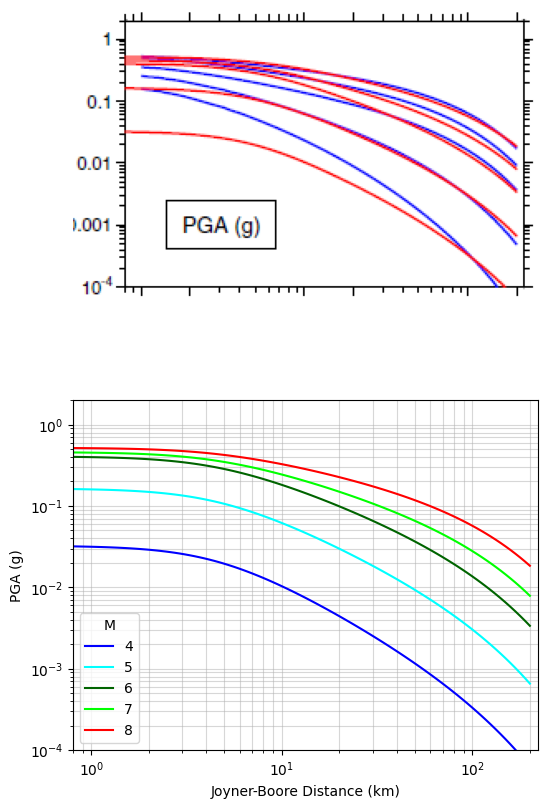

In [3]:
# Reproduce PGA part of Fig. 7 from BSSA14 model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.ground_motion_models import bssa14

rjb_vec = np.logspace(np.log(0.8), np.log10(200), 100)
m_vec = np.asarray([4, 5, 6, 7, 8])
rjb = np.empty(len(m_vec) * len(rjb_vec), dtype=float)
m = np.empty(len(m_vec) * len(rjb_vec), dtype=float)
I = 0
for i in range(len(m_vec)):
    for j in range(len(rjb_vec)):
        m[I] = m_vec[i]
        rjb[I] = rjb_vec[j]
        I += 1

vs30 = 760
fault_type = np.full(len(m), 3)

mu_ln, sigma_ln = bssa14.get_im(vs30,rjb,m,fault_type)
pga = np.exp(mu_ln)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))

image = mpimg.imread('bssa14_validation.png')
ax[0].imshow(image)
ax[0].axis('off')
for i, m_val in enumerate(m_vec):
    ax[1].plot(rjb[m == m_val], pga[m == m_val], label=str(m_val), c=colors[i])
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylim(0.0001, 2)
ax[1].set_xlim(0.8, 220)
ax[1].legend(title='M')
ax[1].grid(True, alpha=0.5, which='both')
ax[1].set_xlabel('Joyner-Boore Distance (km)')
ax[1].set_ylabel('PGA (g)')

Text(0, 0.5, 'PGA (g)')

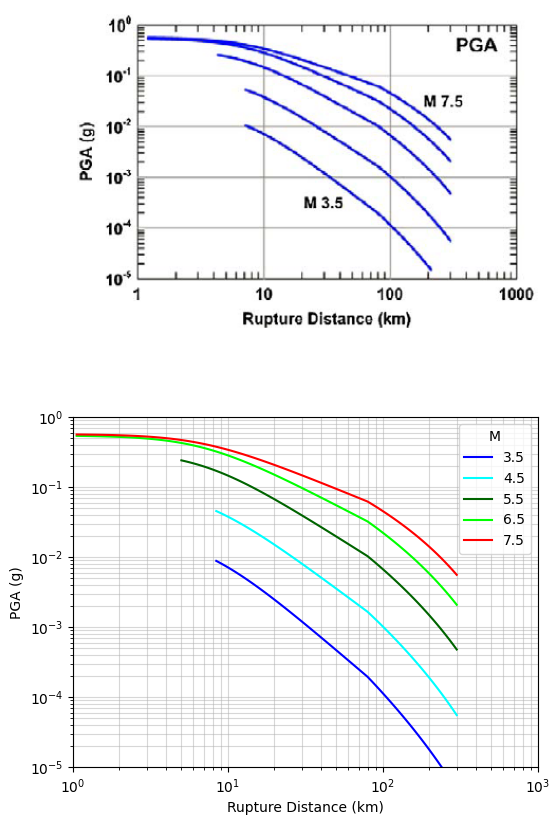

In [6]:
# Reproduce Fig. 6 from CB14 model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.ground_motion_models import cb14

rrup_vec = np.logspace(0, np.log10(300), 100)
m_vec = np.asarray([3.5, 4.5, 5.5, 6.5, 7.5])
rrup_lim = np.asarray([8, 8, 5, 1.0, 1.0])
ztor_vec = np.asarray([8, 8, 5, 0.0, 0.0])
colors = np.asarray(['blue', 'cyan', 'darkgreen', 'lime', 'red', 'magenta'])
rrup = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
m = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
ztor = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
zhyp = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
zbor = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
I = 0
vs30 = 760
dip = np.full(len(m), 90.0)
rx = np.full(len(m), 0.0)
rx1 = np.full(len(m), 0.0)
fault_type = np.full(len(m), 3)
for i in range(len(m_vec)):
    for j in range(len(rrup_vec)):
        m[I] = m_vec[i]
        rrup[I] = rrup_vec[j]
        ztor[I] = np.max([2.673 - 1.136 * np.max([m[I] - 4.970, 0]), 0])**2
        W = np.sqrt(10 ** ((m[I] - 4.07) / 0.98))
        zhyp[I] = ztor[I] - 0.5 * W * np.sin(dip[I] * np.pi / 180.0)
        zbor[I] = ztor[I] + W
        I += 1


mu_ln, sigma_ln = cb14.get_im(vs30,rjb,rrup,rx,rx1,m,fault_type,ztor,zbor,dip)
pga = np.exp(mu_ln)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))

image = mpimg.imread('cb14_validation.png')
ax[0].imshow(image)
ax[0].axis('off')
for i, m_val in enumerate(m_vec):
    ax[1].plot(rrup[(m == m_val) & (rrup > rrup_lim[i])], pga[(m == m_val) & (rrup > rrup_lim[i])], label=str(m_val), c=colors[i])
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylim(0.00001, 1)
ax[1].set_xlim(1, 1000)
ax[1].legend(title='M')
ax[1].grid(True, alpha=0.5, which='both')
ax[1].set_xlabel('Rupture Distance (km)')
ax[1].set_ylabel('PGA (g)')

Text(0, 0.5, 'PGA (g)')

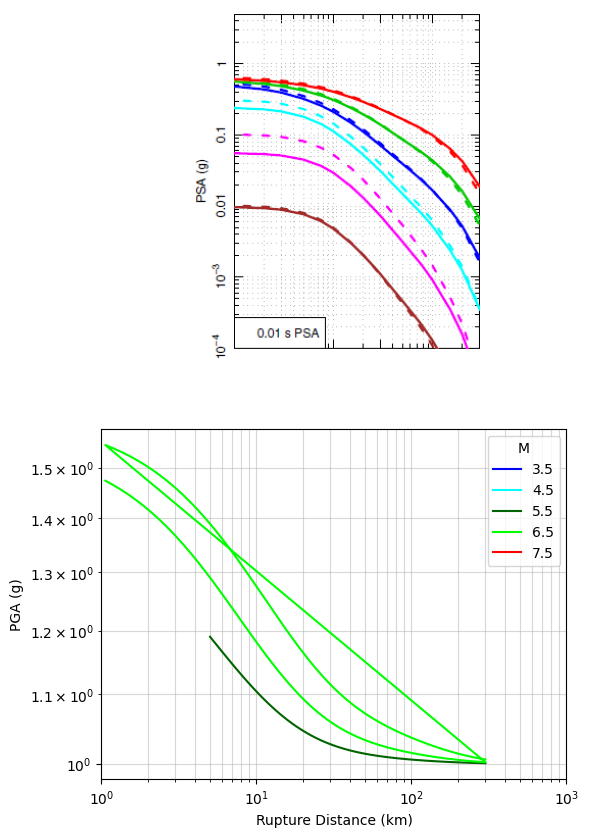

In [11]:
# Reproduce Fig. 6 from CB14 model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ucla_plha.ground_motion_models import cy14

rrup_vec = np.logspace(0, np.log10(300), 100)
m_vec = np.asarray([3.5, 4.5, 5.5, 6.5, 7.5])
rrup_lim = np.asarray([8, 8, 5, 1.0, 1.0])
ztor_vec = np.asarray([8, 8, 5, 0.0, 0.0])
colors = np.asarray(['blue', 'cyan', 'darkgreen', 'lime', 'red', 'magenta'])
rrup = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
m = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
ztor = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
zhyp = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
zbor = np.empty(len(m_vec) * len(rrup_vec), dtype=float)
I = 0
vs30 = 760
dip = np.full(len(m), 90.0)
rx = np.full(len(m), 0.0)
rx1 = np.full(len(m), 0.0)
fault_type = np.full(len(m), 3)
for i in range(len(m_vec)):
    for j in range(len(rrup_vec)):
        m[I] = m_vec[i]
        rrup[I] = rrup_vec[j]
        ztor[I] = np.max([2.673 - 1.136 * np.max([m[I] - 4.970, 0]), 0])**2
        W = np.sqrt(10 ** ((m[I] - 4.07) / 0.98))
        zhyp[I] = ztor[I] - 0.5 * W * np.sin(dip[I] * np.pi / 180.0)
        zbor[I] = ztor[I] + W
        I += 1

measured_vs30 = False
mu_ln, sigma_ln = cy14.get_im(vs30,rjb,rrup,rx,m,fault_type,measured_vs30,dip,ztor,z1p0=None)
pga = np.exp(mu_ln)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))

image = mpimg.imread('cy14_validation_ss.png')
ax[0].imshow(image)
ax[0].axis('off')
for i, m_val in enumerate(m_vec):
    ax[1].plot(rrup[(m == m_val) & (rrup > rrup_lim[i])], pga[(m == m_val) & (rrup > rrup_lim[i])], label=str(m_val), c=colors[i])
ax[1].set_yscale('log')
ax[1].set_xscale('log')
# ax[1].set_ylim(0.00001, 1)
ax[1].set_xlim(1, 1000)
ax[1].legend(title='M')
ax[1].grid(True, alpha=0.5, which='both')
ax[1].set_xlabel('Rupture Distance (km)')
ax[1].set_ylabel('PGA (g)')